In [1]:
import helpers
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Story Appendix

## DataFrame erstellen

In [2]:
df = helpers.createDataFrame("../data/Data.csv")
df2 = helpers.dropDuplicateStars(df)
df

,planet_name,planet_mass,orbital_radius,host_name,amount_of_planets,spectral_type,stellar_age,stellar_radius,stellar_mass,stellar_temperature,stellar_luminosity,optical_magnitude,near_ir_magnitude,stellar_surface_gravity,stellar_metallicity
0,11 Com b,3.789975,0.110590,11 Com,1,K,NaN,19.00,2.70,4742.0,2.243,4.740,2.282,2.31,-0.350
1,11 UMi b,3.670692,0.184691,11 UMi,1,K,1.56,29.79,2.78,4213.0,2.430,5.016,1.939,1.93,-0.020
2,14 And b,3.183412,-0.080922,14 And,1,G,4.50,11.00,2.20,4813.0,1.763,5.227,2.331,2.63,-0.240
3,14 Her b,3.170581,0.466868,14 Her,1,K,5.24,0.93,0.90,5338.0,-0.151,6.610,4.714,4.45,0.410
4,16 Cyg B b,2.752615,0.220108,16 Cyg B,1,G,7.40,1.13,1.08,5750.0,0.100,6.250,4.651,4.36,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,tau Gem b,3.816042,0.068186,tau Gem,1,K,1.22,26.80,2.30,4388.0,2.519,4.420,1.681,1.96,0.140
1374,ups And b,2.339513,-1.227517,ups And,3,F,5.00,1.56,1.30,6183.0,0.561,4.100,2.859,4.16,0.040
1375,ups And d,3.118337,0.400243,ups And,3,F,5.00,1.56,1.30,6183.0,0.561,4.100,2.859,4.16,0.040
1376,ups And c,2.799061,-0.082088,ups And,3,F,5.00,1.56,1.30,6183.0,0.561,4.100,2.859,4.16,0.040


Pro Exoplanet gibt es eine Reihe im Datensatz, inklusive den Angaben seines Hoststerns. Hat ein System mehrere Planeten, so ist der Eintrag des betreffenden Sterns mehrfach vorhanden. Damit Analysen von planetaren und stellaren Eigenschaften durchgeführt werden können ohne die Ergebnisse durch die mehrfach vorkommenden Sterne zu verfälschen, wird für die Analyse der Sterne ein zweiter Dataframe erstellt, der alle Duplikate des Sternennames mit entsprechender Reihe entfernt. Die Spalte "amount_of_planets" wurde zusätzlich zum Datensatz ergänzt, die die Anzahl der Planeten im System pro Stern zählt. Ausserdem wurden alle Sterne entfernt, die keinen Spektraltypen haben.

## Eigenschaften der Hoststerne

### Spektraltyp (spectral_type)
Klassifizierung des Sterns basierend auf den charakteristischen Eigenschaften seines Lichtspektrums nach dem Mergan-Keenan system.

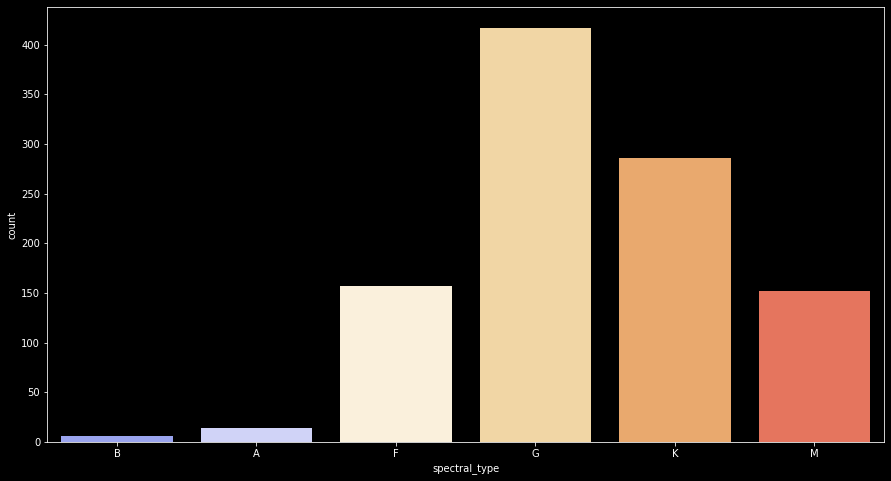

In [3]:
helpers.drawCountPlot(df2, helpers.getColors(), helpers.getSpectralTypes())

Der Plot zeigt die Verteilung der Spektraltypen von Sternen, die mindesten einen Planet in ihrem Orbit haben. Weil der Datensatz um Exoplaneten und deren Hoststerne handelt, ist es nicht weiter verwunderlich, dass G-Sterne (sonnenähnlich) dabei am häufigsten vorkommen. F-, G-, K-, und M-Sterne sind die kältesten 4 Sterntypen. Es ist also ersichtlich, dass vor allem (vergleichsweise zur Spektraltypenskala, siehe Link unten) kalte Sterne Planeten haben. Von den wärmeren beiden Typen A und B gibt es nicht sehr viele bekannten Sterne mit Planeten. Beim den heissesten O-Sternen (hier im Datensatz nicht vertreten) hat man bisher kaum Planeten gefunden.

Spektraltypen: https://space.fandom.com/wiki/Stellar_classification

### Alter (stellar_age)
Alter des Heimatsterns in Jahrmilliarden (Mrd. J.).

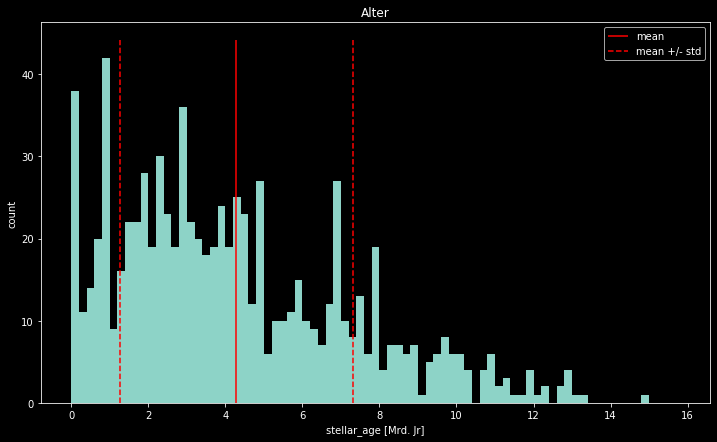

Einheit:  [Mrd. Jr]
Minimum:  0.001
Maximum:  14.9
Mittelwert:  4.283
Median:  3.64
Modus:  1.0
Standardabweichung:  3.029
1. Quartil:  2.0
3. Quartil:  6.34
Quartilsdifferenz:  4.34


In [4]:
age_df = df2.loc[df2.stellar_age.isna() == False] 
helpers.drawHist(age_df.stellar_age, 'stellar_age', '[Mrd. Jr]', 0.2, 'Alter')

Der Plot zeigt die Verteilung des Alters der Sterne. Die Form der Verteilung deutet auf eine Rechtsschiefe mit leichter langschwänzigkeit hin. Der Grossteil der Sterne ist zwischen 2 und 6.34 Milliarden Jahre alt. Der jüngste Stern ist vergleichsweise mit dem Mittelwert (4.283 Milliarden Jahre) gerade mal eine Million Jahre alt. Es gibt einige Exoten, die gegen das Alter des Universums selbst streben (Zwischen 12 und 14 Milliarden Jahre nach https://wmap.gsfc.nasa.gov/universe/uni_age.html). Es gibt einen Stern, der dieses Alter übersteigt mit 14.9 Milliarden Jahren, was mich etwas an der Korrektheit dessen Alters zweifeln lässt. 

### Radius (stellar_radius)
Radius des Hoststerns in Sonnenradien.

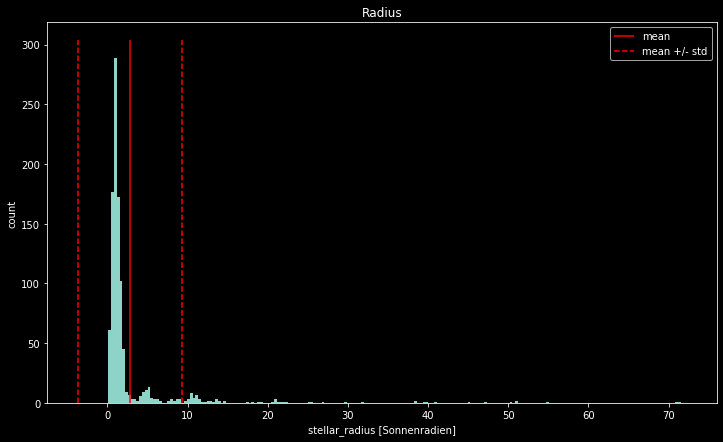

Einheit:  [Sonnenradien]
Minimum:  0.11
Maximum:  71.23
Mittelwert:  2.817
Median:  1.11
Modus:  0.85
Standardabweichung:  6.539
1. Quartil:  0.83
3. Quartil:  1.65
Quartilsdifferenz:  0.82


In [5]:
radius_df = df2.loc[df2.stellar_radius.isna() == False] 
helpers.drawHist(radius_df.stellar_radius, 'stellar_radius', 
                 '[Sonnenradien]', 0.35, 'Radius')

Der Plot zeigt die Verteilung des Radius der Sterne. Die Verteilung ist sehr lanschwänzig gegen Rechts. Der Grossteil der Sterne hat einen Radius zwischen  0.83 und 1.65 Sonnenradien, wobei sich auch noch eine erhöhte Anzahl zwischen 1 und 15 Sonnenradien befindet. Der kleinste Stern hat einen Radius, der fast 10 mal kleiner ist als der unserer Sonne. Es gibt ausserdem wenige gigantische Exoten, die einen Radius von bis zu 70 Sonennradien besitzen.

### Masse (stellar_mass)
Masse des Hoststerns in Sonnenmassen.

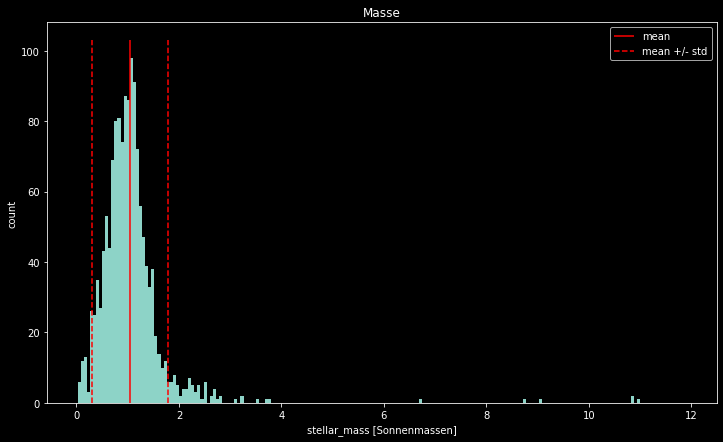

Einheit:  [Sonnenmassen]
Minimum:  0.02
Maximum:  10.94
Mittelwert:  1.048
Median:  0.99
Modus:  0.77
Standardabweichung:  0.739
1. Quartil:  0.73
3. Quartil:  1.22
Quartilsdifferenz:  0.49


In [6]:
mass_df = df.loc[df.stellar_mass.isna() == False] 
helpers.drawHist(mass_df.stellar_mass, 'stellar_mass', '[Sonnenmassen]', 0.06, 'Masse')

Der Plot zeigt die Verteilung des Masse der Sterne. Die Verteilung ist sehr lanschwänzig gegen Rechts. Der Grossteil der Sterne haben eine Masse zwischen 0.73 und 1.22 Sonnenmassen, also ähnlich massig wie die Sonne. Der kleinste Stern hat eine Masse, die 50 mal kleiner ist als die der Sonne. Es gibt ausserdem wenige gigantische Exoten, die einen Masse von bis zu fast 11 Sonnenmassen besitzen.

### Temperatur (stellar_temperature)
Oberflächentemperatur des Hoststerns in Kelvin.

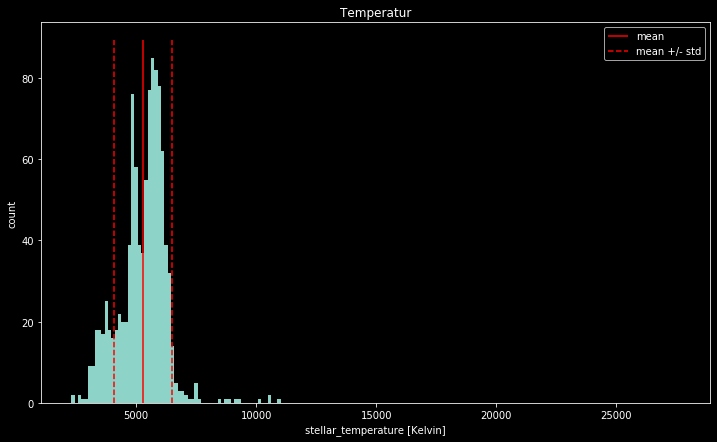

Einheit:  [Kelvin]
Minimum:  2300.0
Maximum:  27730.0
Mittelwert:  5302.473
Median:  5449.0
Modus:  5600.0
Standardabweichung:  1205.861
1. Quartil:  4795.0
3. Quartil:  5902.25
Quartilsdifferenz:  1107.25


In [7]:
temperature_df = df2.loc[df2.stellar_temperature.isna() == False] 
helpers.drawHist(temperature_df.stellar_temperature, 'stellar_temperature',
                 '[Kelvin]', 277/2, 'Temperatur')

Der Plot zeigt eine linksschiefe Verteilung, die langschwänzig gegen rechts ist. Die meisten Sterne sind zwischen 4795.0 und 5902.25 Kelvin heiss. Nach dem dritten Quartil (5902.25K) gibt es einen massiven Abstieg an Häufigkeit der Vorkommnisse. Es gibt wenige, die 10000 Kelvin übersteigen und vermutlich ein einziger (Anzahl zu klein um ersichtlich zu sein), der mit 27730 Kelvin den Plot in die Länge zieht.

### Lichtstärke (stellar_luminosity)
Amount of energy emitted by a star per unit time, measured in units of solar luminosities.

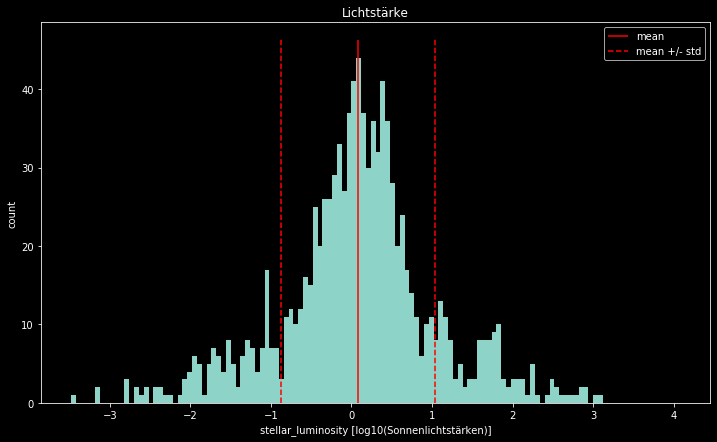

Einheit:  [log10(Sonnenlichtstärken)]
Minimum:  -3.48
Maximum:  3.095
Mittelwert:  0.08
Median:  0.098
Modus:  0.1
Standardabweichung:  0.961
1. Quartil:  -0.384
3. Quartil:  0.536
Quartilsdifferenz:  0.92


In [8]:
luminosity_df = df2.loc[df2.stellar_luminosity.isna() == False] 
helpers.drawHist(luminosity_df.stellar_luminosity, 'stellar_luminosity', 
                 '[log10(Sonnenlichtstärken)]', 0.06, 'Lichtstärke')

Der Plot zeigt die Verteilung der Lichtstärke der Sterne. Der Grossteil der Sterne hat eine Lichtstärke von -0.386 log(Sonnenlichtstärken) bis 0.536 log(Sonnenlichtstärken), befinden sich also um die Lichtstärke der Sonne. Es gibt doch einige Sterne, die über 1000 mal weniger leuchten wie die Sonne, aber auch solche die es über 1000-Fach stärker tun. Die Verteilung der Lichtstärke ist recht symmentisch ist.

### Optische Magnitude (optical_magnitude)
Brightness of the host star as measured using the V (Johnson) or the Kepler-band in units of magnitudes.

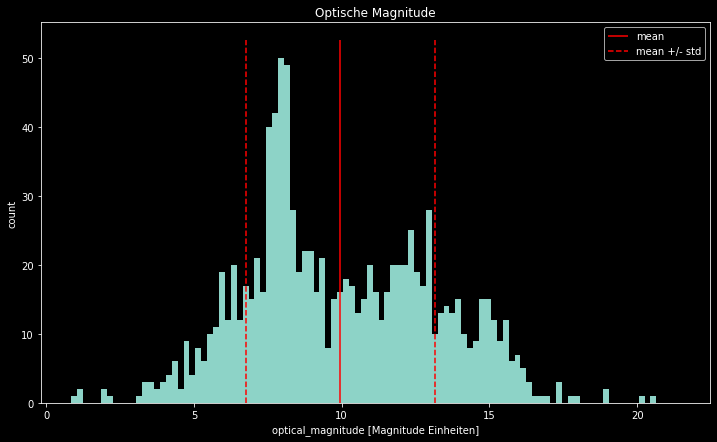

Einheit:  [Magnitude Einheiten]
Minimum:  0.85
Maximum:  20.48
Mittelwert:  9.952
Median:  9.37
Modus:  8.05
Standardabweichung:  3.191
1. Quartil:  7.692
3. Quartil:  12.427
Quartilsdifferenz:  4.734


In [9]:
magnitude_df = df2.loc[df2.optical_magnitude.isna() == False] 
helpers.drawHist(magnitude_df.optical_magnitude, 'optical_magnitude', 
                 '[Magnitude Einheiten]', 0.2, 'Optische Magnitude')

Der Plot zeigt die Verteilung der optischen Magnitude. Es handelt sich hierbei um eine multimodale Verteilung mit 2 Modi bei ungefähr 8 und 12.5 Magnitude Einheiten. Der Grossteil der Sterne liegt zwischen 7.692 und 12.427 Magnitude Einheiten. Die optische Magnitude beschreibt, wie grell ein Stern am Himmel erscheint, jedoch umgekehrt. Je höher der Wert der Magnitude, desto kleiner erscheint der Stern.

### near_ir_magnitude
Brightness of the host star as measured using the Ks (2MASS) or the J (2MASS) in units of magnitudes.

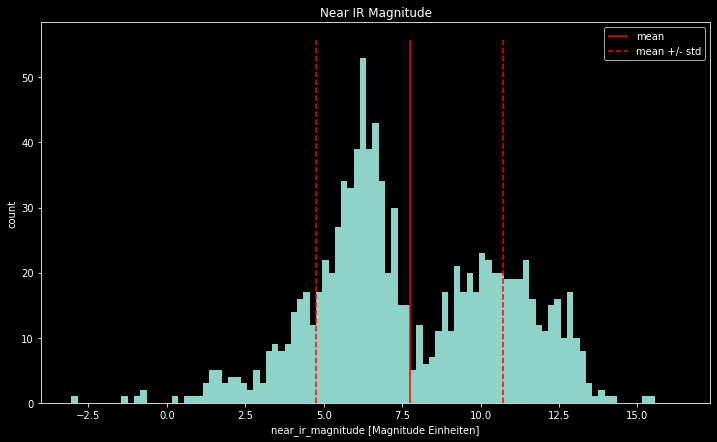

Einheit:  [Magnitude Einheiten]
Minimum:  -3.044
Maximum:  15.495
Mittelwert:  7.743
Median:  7.035
Modus:  3.911
Standardabweichung:  2.984
1. Quartil:  5.707
3. Quartil:  10.305
Quartilsdifferenz:  4.598


In [10]:
ir_magnitude_df = df2.loc[df2.near_ir_magnitude.isna() == False] 
helpers.drawHist(ir_magnitude_df.near_ir_magnitude, 'near_ir_magnitude', 
                 '[Magnitude Einheiten]', 0.2, 'Near IR Magnitude')

Der Plot zeigt die Verteilung der Near-IR-Magnitude. Die Form und Verteilung ist sehr ähnlich wie die der optische Magnitude, jedoch eine etwas andere Skala.

### Oberflächenanziehungskraft (stellar_surface_gravity)
Gravitational acceleration experienced at the stellar surface, measured in cm/s**2.

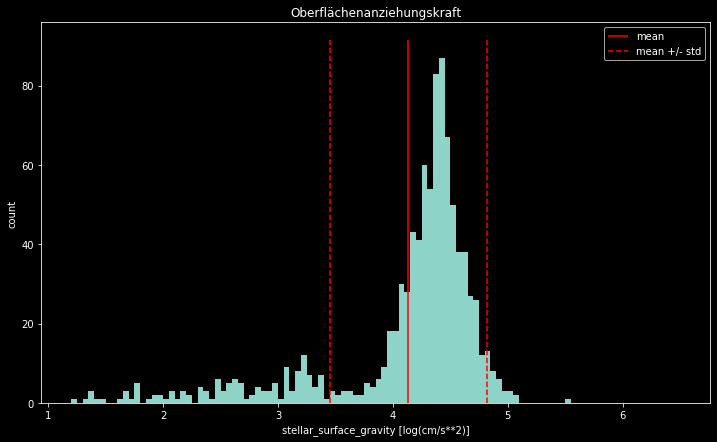

Einheit:  [log(cm/s**2)]
Minimum:  1.2
Maximum:  5.52
Mittelwert:  4.134
Median:  4.35
Modus:  4.45
Standardabweichung:  0.683
1. Quartil:  4.092
3. Quartil:  4.5
Quartilsdifferenz:  0.408


In [11]:
gravity_df = df2.loc[df2.stellar_surface_gravity.isna() == False] 
helpers.drawHist(gravity_df.stellar_surface_gravity, 
                 'stellar_surface_gravity', '[log(cm/s**2)]', 0.05, 'Oberflächenanziehungskraft')

Der Plot zeigt die Verteilung der Oberflächenanziehungskraft der Sterne. Die Verteilung ist lanschwänzig gegen links. Der Grossteil der Sterne befindet sich zwischen 4.092 und 4.5 log(cm/s**2). Die schwächste Anziehungskraft ist über 10000 mal kleiner, als die der Stärksten.

### Metallizität (stellar_metallicity)
Measurement of the metal content of the photosphere of the star as compared to the hydrogen content, measured in Dex (see https://joe-antognini.github.io/astronomy/what-is-a-dex).

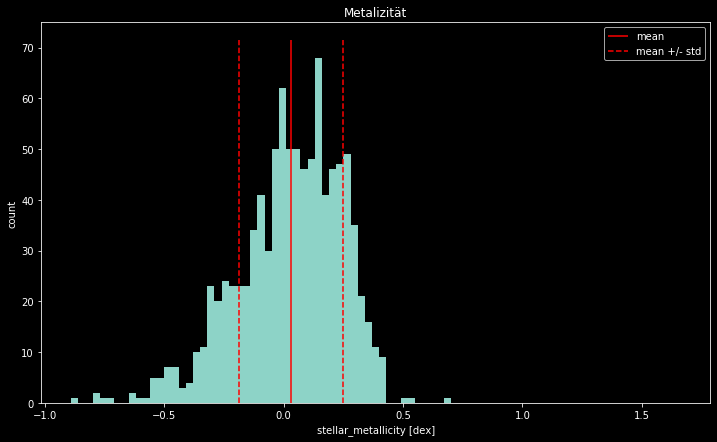

Einheit:  [dex]
Minimum:  -0.89
Maximum:  0.69
Mittelwert:  0.03
Median:  0.05
Modus:  0.0
Standardabweichung:  0.218
1. Quartil:  -0.1
3. Quartil:  0.19
Quartilsdifferenz:  0.29


In [12]:
metallicity_df = df2.loc[df2.stellar_metallicity.isna() == False] 
helpers.drawHist(metallicity_df.stellar_metallicity, 'stellar_metallicity', 
                 '[dex]', 0.03, 'Metalizität')

Der Plot zeigt die Metallizität der Sterne. Der Grossteil befindet sich zwischen -0.1 und 0.19 dex. Die Verteilung hat eine asymetrische leicht linksschiefe Form und reicht von -0.89 bis 0.69 dex.

## Eigenschaften der Planeten

### Anzahl Planeten im System (amount_of_planets)
Die Anzahl Planeten in diesem Sternensystem

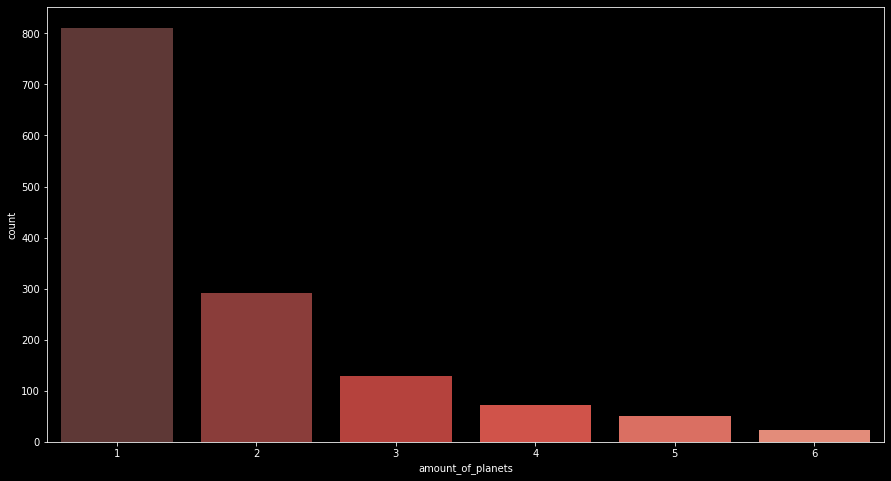

In [13]:
helpers.drawCountPlotPlanets(df)

Der Plot zeigt, wie viele Sternensystem es von den jeweiligen Grössenordnungen gibt. Die Häufigkeit an Vorkommen nimmt mit der Zunahme an Planeten ab. Mehr als die Hälfte der bisher entdeckten Planeten sind alleine in ihrem System. Es gibt eigentlich noch ein System mit 7 Planeten und eines mit 8. Diese wurden allerdings wegen Mangel an Spektraltypen rausgefiltert. 

### Planetmasse (planet_mass)
Die Masse des Planeten

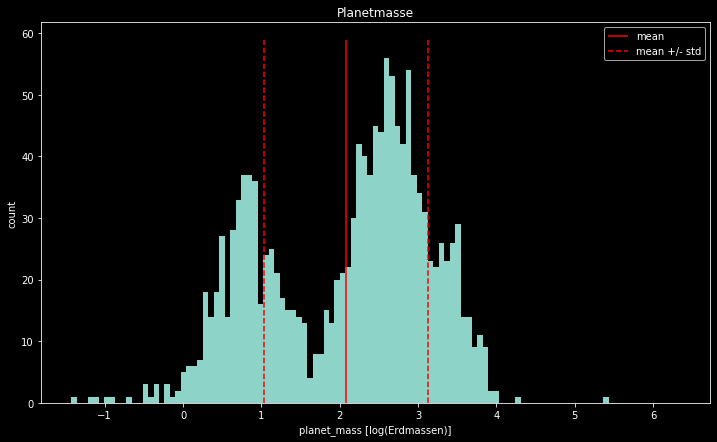

Einheit:  [log(Erdmassen)]
Minimum:  -1.427
Maximum:  5.378
Mittelwert:  2.081
Median:  2.357
Modus:  0.668
Standardabweichung:  1.051
1. Quartil:  1.088
3. Quartil:  2.866
Quartilsdifferenz:  1.777


In [14]:
planet_mass_df = df.loc[df.planet_mass.isna() == False] 
helpers.drawHist(planet_mass_df.planet_mass, 'planet_mass', 
                 '[log(Erdmassen)]', 0.07, 'Planetmasse')

Dieser Plot zeigt die Verteilung der Masse der Planeten. Die Form der Verteilung ist Multimodal mit zwei Modi bei ungefähr 0.8 log(Erdmassen) und 6 log(Erdmassen). Fast alle Exoplamneten haben eine Masse von der Erdmasse (0) und 9 log(Erdmassen). Die meisten Planeten sind also extrem viel massiger als die Erde (im Schnitt über 100 mal) mit einem Spitzenreiter, der über 100000 massiger ist.

### Orbitalradius (orbital_radius)

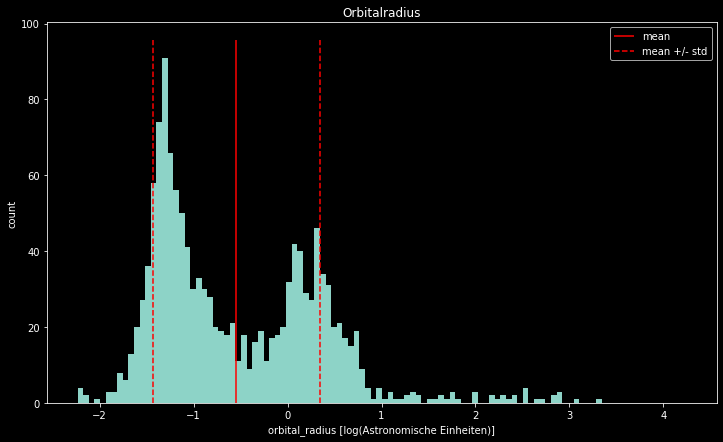

Einheit:  [log(Astronomische Einheiten)]
Minimum:  -2.237
Maximum:  3.301
Mittelwert:  -0.545
Median:  -0.825
Modus:  -1.222
Standardabweichung:  0.888
1. Quartil:  -1.284
3. Quartil:  0.134
Quartilsdifferenz:  1.417


In [15]:
orbital_radius_df = df.loc[df.orbital_radius.isna() == False] 
helpers.drawHist(orbital_radius_df.orbital_radius, 'orbital_radius', 
                 '[log(Astronomische Einheiten)]', 0.06, 'Orbitalradius')

Der Plot zeigt die Verteilung des Orbitalradius der Planeten. Die Verteilung zeigt eine Multimodale Form mit 2 Modi bei ungefähr -1.3 und 0.3 log(Astronomische Einheiten). Ausserdem ist die Form der Verteilung langschwänzig gegen rechts. Da der Median negativ ist, sind im Schnitt die Planeten näher an ihren Sternen als die Erde an der Sonne. Es gibt wenige Exoten, die massiv viel weiter entfernt sind (bis über 1000 mal).

## Ergänzende Analysen zur Datastory

### Die Spektraltypen im Vergleich: Alter

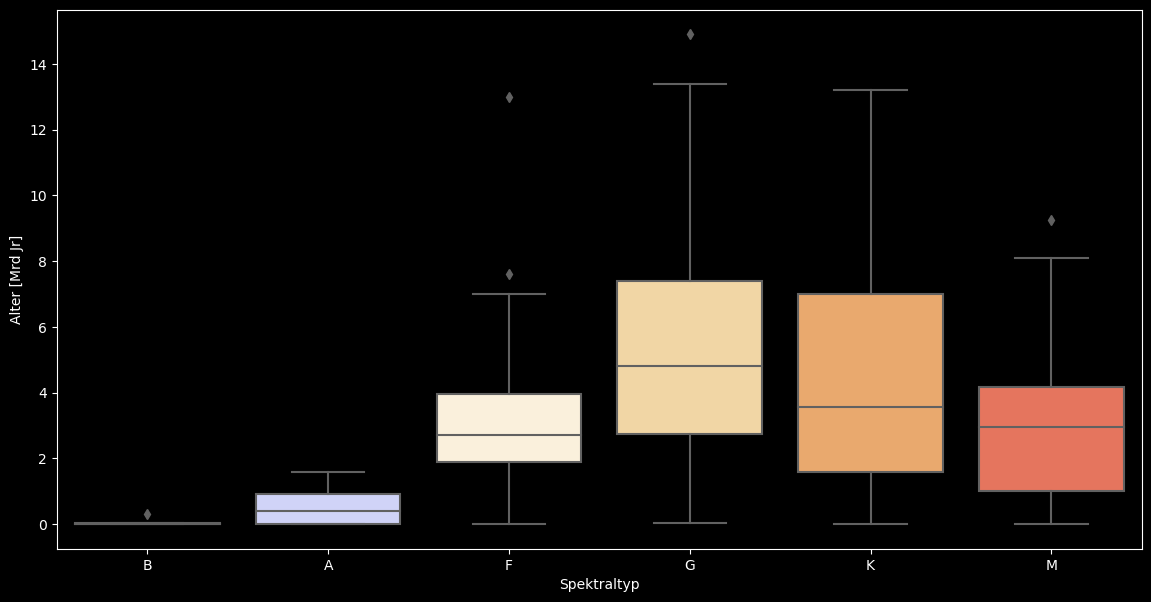

In [16]:
helpers.drawBoxplot(df2, 'stellar_age', 'Alter', '[Mrd Jr]')

Der Plot zeigt die Verteilung des Alters der Sterne pro Spektraltyp. Ersichtlich ist, dass die beiden bläulichen Spektaltypen sehr jung sind im Vergleich zu den anderen. Daraus lässt sich schliessen, dass Sterne, die in diesen Spektraltypen klassifiziert sind entweder sich in ihren Anfangsstadien befinden oder generell nicht lange existieren.

### Die Spektraltypen im Vergleich: Masse

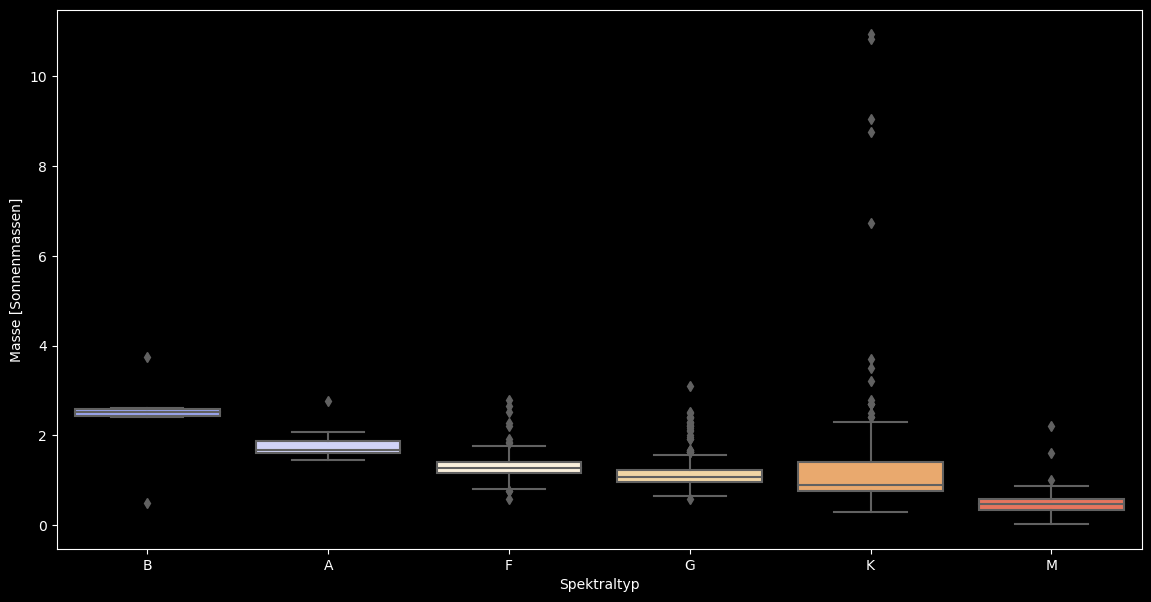

In [17]:
helpers.drawBoxplot(df2, 'stellar_mass', 'Masse', '[Sonnenmassen]')

Der Plot zeigt die Verteilung der Masse pro Spektraltyp. Mit der Senkung der Intensität der bläue und der Steigung der röte des Lichtspektrums nimmt die Masse generell ab. Tendenziell gilt: Je blauer ein Stern, desto massiger. Es gibt Exoten bei den B-Sternen, die sehr viel kleiner sind als andere in diesem Spektraltyp. Bei den K-Sternen gibt es viele Sterne, bei denen die Masse stark in die Höhe ausschlägt. Trotz des grundsätzlich linearen Verhältnisses der Masse zum Sternentyp würde ich die Masse als nicht zwingend ausschlaggebend für die Spektaltypen bezeichnen, weil es viele Exoten gibt die diese nicht einhalten. 

### Die Spektraltypen im Vergleich: Optische Magnitude

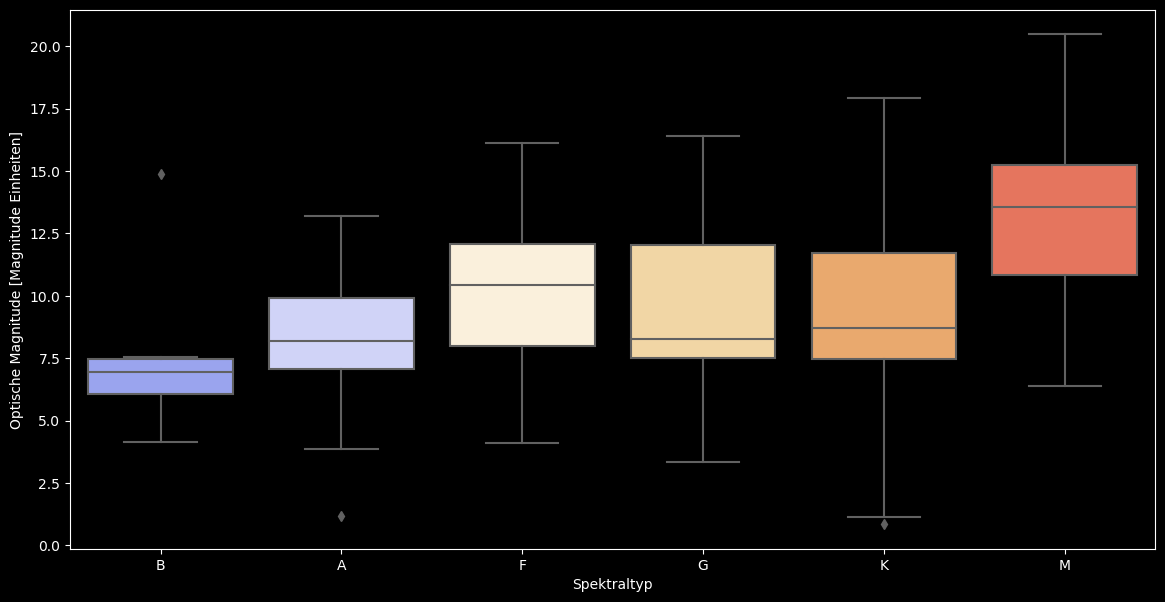

In [18]:
helpers.drawBoxplot(df2, 'optical_magnitude', 'Optische Magnitude', '[Magnitude Einheiten]')

Der Plot zeigt die Verteilung der optischen Magnitude pro Spektraltyp. Mit der Senkung der Intensität der bläue und der Steigung der röte des Lichtspektrums nimmt die optische Magnitude tendenziell zu. Je blauer ein Stern, desto kleiner der Wert der optischen Magnitude (also desto greller der Stern am Himmel). Die Steigung ist mit den Spektraltypen nicht ganz linear, da sie beim Typ G wieder abnimmt, bei Typ K ungefähr gleich bleibt und dann gegen Typ M wieder zunimmt. Die optische Magnitude ist also ein Indikator für den Spektraltypen, aber nicht klar definierend.

### Einflüsse der Spektraltypen auf planetare Eigenschaften: Orbitalradius

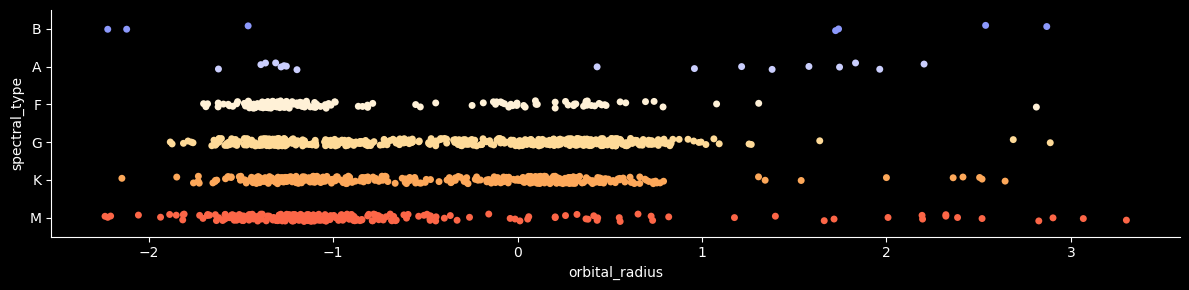

In [19]:
helpers.drawCatplot(df, 'orbital_radius')

Der Plot zeigt die Verteilung des orbitalen Radius der Planeten pro Spektraltyp. Es gibt auch hier eine Tendenz, dass heisse blaue Spektraltypen eine grössere Distanz zu ihren Planeten haben, jedoch gibt es viele Planeten, vor allem bei den Typen B, A und M die über den ganzen Interwall des orbitalen Radius verteilt sind. Hier ist nur sehr schwache Abhängigkeit erkennbar.